In [1]:
''' Import libraries'''
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [2]:
## Normalize the data and return the data with a mean of zero
def normalizeData(dataMatrix):
    distance_mean = np.mean(dataMatrix)
    distance_sd = np.std(dataMatrix)
    mean_zero = (dataMatrix-distance_mean)/distance_sd
    return mean_zero

def standardize(X, mean, stds):
    return (X - mean)/stds

def accuracy(truth, predict):
    return (np.sum(truth == predict))/truth.shape[0]

In [3]:
def makeIndicatorVars(T):
    # T should be two-dimensional. Should be nSamples x 1.
    if T.ndim == 1:
        T = T.reshape((-1, 1))    
    return (T == np.unique(T)).astype(int)

def softmax(X, w):
    fs = np.exp(X @ w)  # N x K
    denom = np.sum(fs, axis=1).reshape((-1, 1))
    gs = fs / denom
    return gs

def percentCorrect(p, t):
    return np.sum(p.ravel()==t.ravel()) / float(len(t)) * 100

In [4]:
''' Data Files from experiements. Adjust paths as needed. '''
## Path = ('path+file.csv', header = None)

trainDistances = pd.read_csv('data/train_distances500.csv', header = None)
testDistances = pd.read_csv('data/test_distances500.csv', header = None)
testDistances.shape

(84657, 7)

In [5]:
''' Create the data frame to store the accuracies of the models'''
df = pd.DataFrame(columns=['Model', 'Training Acc', 'Testing Acc'])

In [6]:
'''
Standardize the data so that it can be read in and used for the models.
'''
trainArray = np.asarray(trainDistances)
trainMatrix = trainArray[:, 1:]

X_train = normalizeData(trainMatrix)
Y_train = trainArray[:, 0]

testArray = np.asarray(testDistances)
testMatrix = testArray[:, 1:]


X_test = normalizeData(testMatrix)
Y_test = testArray[:, 0]

In [7]:
''' Smallest Translation Distance'''
min_x_train = X_train.argmin(axis = 1)
min_x_test = X_test.argmin(axis = 1)

tl_train_acc = accuracy(Y_train, min_x_train)
tl_acc = accuracy(Y_test, min_x_test)

df = df._append({'Model': 'Translation Distance', 'Training Acc': tl_train_acc, 'Testing Acc': tl_acc}, ignore_index=True)

/var/folders/hv/ncqv9zp94j58j784hdkwq4p00000gn/T/ipykernel_71985/4229201025.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = df._append({'Model': 'Translation Distance', 'Training Acc': tl_train_acc, 'Testing Acc': tl_acc}, ignore_index=True)


In [8]:
''' Multilayer Perceptron'''
mlp_model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
mlp_model.fit(X_train, Y_train)
mlp_train = mlp_model.predict(X_train)
mlp_pred = mlp_model.predict(X_test)

mlp_train_acc = accuracy(Y_train, mlp_train)
mlp_test_acc = accuracy(Y_test, mlp_pred)

df = df._append({'Model': 'MLP', 'Training Acc': mlp_train_acc, 'Testing Acc': mlp_test_acc}, ignore_index=True)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [9]:
''' Logistic Regression'''
clf_model = LogisticRegression(random_state=0).fit(X_train, Y_train)
clf_train = clf_model.predict(X_train)
clf_pred = clf_model.predict(X_test)

clf_train_acc = accuracy(Y_train, clf_train)
clf_test_acc = accuracy(Y_test, clf_pred)


df = df._append({'Model': 'Logistic Regression', 'Training Acc': clf_train_acc, 'Testing Acc': clf_test_acc}, ignore_index=True)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
''' SVM Model: Poly Kernel'''
svm_poly_model = svm.SVC(kernel="poly", degree=3, gamma="auto", C=1.0, probability = True)
svm_poly_model.fit(X_train, Y_train)
svm_poly_train = svm_poly_model.predict(X_train)
svm_poly_pred = svm_poly_model.predict(X_test)

poly_train_acc = accuracy(Y_train, svm_poly_train)
poly_acc = accuracy(Y_test, svm_poly_pred)


df = df._append({'Model': 'SVM Poly Kernel', 'Training Acc': poly_train_acc, 'Testing Acc': poly_acc}, ignore_index=True)


In [11]:
''' SVM Model: RBF Kernel'''
svm_rbf_model = svm.SVC(kernel="rbf", gamma=0.7, C=1.0)
svm_rbf_model.fit(X_train, Y_train)
svm_rbf_train = svm_rbf_model.predict(X_train)
svm_rbf_pred = svm_rbf_model.predict(X_test)

rbf_train_acc = accuracy(Y_train, svm_rbf_train)
rbf_acc = accuracy(Y_test, svm_rbf_pred)

df = df._append({'Model': 'SVM RBF Kernel', 'Training Acc': rbf_train_acc, 'Testing Acc': rbf_acc}, ignore_index=True)


In [12]:
''' SVM Model: Linear Kernel'''
svm_lin_model= svm.SVC(kernel="linear", probability = True, random_state = 316)
svm_lin_model.fit(X_train, Y_train)
svm_lin_train = svm_lin_model.predict(X_train)
svm_lin_pred = svm_lin_model.predict(X_test)

lin_train_acc = accuracy(Y_train, svm_lin_train)
lin_acc = accuracy(Y_test, svm_lin_pred)

df = df._append({'Model': 'SVM Linear Kernel', 'Training Acc': lin_train_acc, 'Testing Acc': lin_acc}, ignore_index=True)


LogReg: Percent correct: Train 91.9 Test 92


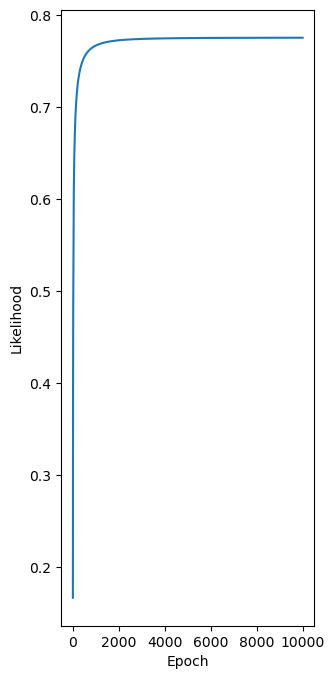

In [13]:
''' Custom Linear Regression model'''

## Adjust the data shape
Xtrains1 = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
Xtests1 = np.hstack((np.ones((X_test.shape[0], 1)), X_test))


TtrainI = makeIndicatorVars(Y_train)
TtestI = makeIndicatorVars(Y_test)

w = np.zeros((Xtrains1.shape[1], TtrainI.shape[1]))
likelihood = []
alpha = 0.0001
for step in range(10000):
    # forward pass
    gs = softmax(Xtrains1, w)
    # backward pass and weight update
    w = w + alpha * Xtrains1.T @ (TtrainI - gs)
    # convert log likelihood to likelihood
    likelihoodPerSample = np.exp( np.sum(TtrainI * np.log(gs)) / X_train.shape[0])
    likelihood.append(likelihoodPerSample)

plt.figure(figsize=(15, 8))
plt.subplot2grid((1, 4), (0, 0))
plt.plot(likelihood)
plt.ylabel('Likelihood')
plt.xlabel('Epoch')

logregOutput = softmax(Xtrains1, w)
predictedTrain = np.argmax(logregOutput, axis=1)
logregOutput = softmax(Xtests1, w)
predictedTestLR = np.argmax(logregOutput, axis=1)

LogReg_train = percentCorrect(predictedTrain, Y_train)
LogReg_acc = percentCorrect(predictedTestLR, Y_test)

print("LogReg: Percent correct: Train {:.3g} Test {:.3g}".format(LogReg_train,
                                                                 LogReg_acc))
df = df._append({'Model': 'LogReg', 'Training Acc': LogReg_train, 'Testing Acc': LogReg_acc}, ignore_index=True)


In [14]:
df

,Model,Training Acc,Testing Acc
0,Translation Distance,0.910300,0.900670
1,MLP,0.883133,0.885574
2,Logistic Regression,0.918700,0.919050
3,SVM Poly Kernel,0.905233,0.912943
4,SVM RBF Kernel,0.914200,0.916498
5,SVM Linear Kernel,0.914000,0.917077
6,LogReg,91.923333,91.961681


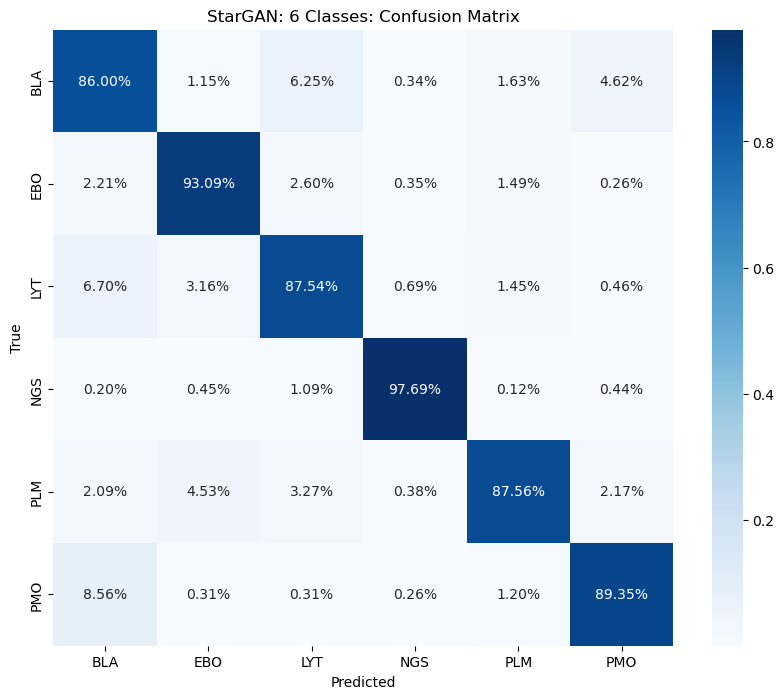

In [15]:
''' Use the best model and create a confusion matrix'''
confusion_matrix6 = confusion_matrix(Y_test, predictedTestLR, labels=[0,1, 2, 3, 4, 5])

# Calculate the sum of each row (the number of true samples for each class)
row_sums = confusion_matrix6.sum(axis=1, keepdims=True)


class_labels= ['BLA', 'EBO', 'LYT', 'NGS', 'PLM', 'PMO']


# Normalize the confusion matrix by dividing each element by the sum of its row
normalized_cm = confusion_matrix6 / row_sums

# Plot normalized confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt='.2%', cbar=True, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('StarGAN: 6 Classes: Confusion Matrix')
plt.show()


In [16]:
### To run a confusion matrix for three classes. 
''' 
confusion_matrix3 = confusion_matrix(Y_test, min_x_test, labels=[0,1, 2])

# Calculate the sum of each row (the number of true samples for each class)
row_sums = confusion_matrix3.sum(axis=1, keepdims=True)


class_labels= ['BLA', 'EBO', 'LYT']


# Normalize the confusion matrix by dividing each element by the sum of its row
normalized_cm = confusion_matrix3 / row_sums

# Plot normalized confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt='.2%', cbar=True, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('StarGAN: 6 Classes: Confusion Matrix')
plt.show()
'''

" \nconfusion_matrix3 = confusion_matrix(Y_test, min_x_test, labels=[0,1, 2])\n\n# Calculate the sum of each row (the number of true samples for each class)\nrow_sums = confusion_matrix3.sum(axis=1, keepdims=True)\n\n\nclass_labels= ['BLA', 'EBO', 'LYT']\n\n\n# Normalize the confusion matrix by dividing each element by the sum of its row\nnormalized_cm = confusion_matrix3 / row_sums\n\n# Plot normalized confusion matrix\nplt.figure(figsize=(10, 8))\nsns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt='.2%', cbar=True, xticklabels=class_labels, yticklabels=class_labels)\nplt.xlabel('Predicted')\nplt.ylabel('True')\nplt.title('StarGAN: 6 Classes: Confusion Matrix')\nplt.show()\n"